(python_advanced_features)=
```{raw} jupyter
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

# More Language Features

## Overview

With this last lecture, our advice is to **skip it on first pass**, unless you have a burning desire to read it.

It's here

1. as a reference, so we can link back to it when required, and
1. for those who have worked through a number of applications, and now want to learn more about the Python language

A variety of topics are treated in the lecture, including iterators, decorators and descriptors, and generators.

## Iterables and Iterators

```{index} single: Python; Iteration
```

We've {ref}`already said something <iterating_version_1>` about iterating in Python.

Now let's look more closely at how it all works, focusing in Python's implementation of the `for` loop.

(iterators)=
### Iterators

```{index} single: Python; Iterators
```

Iterators are a uniform interface to stepping through elements in a collection.

Here we'll talk about using iterators---later we'll learn how to build our own.

Formally, an *iterator* is an object with a `__next__` method.

For example, file objects are iterators .

To see this, let's have another look at the {ref}`US cities data <us_cities_data>`,
which is written to the present working directory in the following cell

In [1]:
%%file us_cities.txt
new york: 8244910
los angeles: 3819702
chicago: 2707120
houston: 2145146
philadelphia: 1536471
phoenix: 1469471
san antonio: 1359758
san diego: 1326179
dallas: 1223229

Writing us_cities.txt


In [2]:
f = open('us_cities.txt')
f.__next__()

'new york: 8244910\n'

In [3]:
f.__next__()

'los angeles: 3819702\n'

We see that file objects do indeed have a `__next__` method, and that calling this method returns the next line in the file.

The next method can also be accessed via the builtin function `next()`,
which directly calls this method

In [4]:
next(f)

'chicago: 2707120\n'

The objects returned by `enumerate()` are also iterators

In [5]:
e = enumerate(['foo', 'bar'])
next(e)

(0, 'foo')

In [6]:
next(e)

(1, 'bar')

as are the reader objects from the `csv` module .

Let's create a small csv file that contains data from the NIKKEI index

In [7]:
%%file test_table.csv
Date,Open,High,Low,Close,Volume,Adj Close
2009-05-21,9280.35,9286.35,9189.92,9264.15,133200,9264.15
2009-05-20,9372.72,9399.40,9311.61,9344.64,143200,9344.64
2009-05-19,9172.56,9326.75,9166.97,9290.29,167000,9290.29
2009-05-18,9167.05,9167.82,8997.74,9038.69,147800,9038.69
2009-05-15,9150.21,9272.08,9140.90,9265.02,172000,9265.02
2009-05-14,9212.30,9223.77,9052.41,9093.73,169400,9093.73
2009-05-13,9305.79,9379.47,9278.89,9340.49,176000,9340.49
2009-05-12,9358.25,9389.61,9298.61,9298.61,188400,9298.61
2009-05-11,9460.72,9503.91,9342.75,9451.98,230800,9451.98
2009-05-08,9351.40,9464.43,9349.57,9432.83,220200,9432.83

Writing test_table.csv


In [8]:
from csv import reader

f = open('test_table.csv', 'r')
nikkei_data = reader(f)
next(nikkei_data)

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']

In [9]:
next(nikkei_data)

['2009-05-21', '9280.35', '9286.35', '9189.92', '9264.15', '133200', '9264.15']

### Iterators in For Loops

```{index} single: Python; Iterators
```

All iterators can be placed to the right of the `in` keyword in `for` loop statements.

In fact this is how the `for` loop works:  If we write

```{code-block} python3
:class: no-execute

for x in iterator:
    <code block>
```

then the interpreter

* calls `iterator.___next___()` and binds `x` to the result
* executes the code block
* repeats until a `StopIteration` error occurs

So now you know how this magical looking syntax works

```{code-block} python3
:class: no-execute

f = open('somefile.txt', 'r')
for line in f:
    # do something
```

The interpreter just keeps

1. calling `f.__next__()` and binding `line` to the result
1. executing the body of the loop

This continues until a `StopIteration` error occurs.

### Iterables

```{index} single: Python; Iterables
```

You already know that we can put a Python list to the right of `in` in a `for` loop

In [10]:
for i in ['spam', 'eggs']:
    print(i)

spam
eggs


So does that mean that a list is an iterator?

The answer is no

In [11]:
x = ['foo', 'bar']
type(x)

list

In [12]:
next(x)

TypeError: 'list' object is not an iterator

So why can we iterate over a list in a `for` loop?

The reason is that a list is *iterable* (as opposed to an iterator).

Formally, an object is iterable if it can be converted to an iterator using the built-in function `iter()`.

Lists are one such object

In [13]:
x = ['foo', 'bar']
type(x)

list

In [14]:
y = iter(x)
type(y)

list_iterator

In [15]:
next(y)

'foo'

In [16]:
next(y)

'bar'

In [17]:
next(y)

StopIteration: 

Many other objects are iterable, such as dictionaries and tuples.

Of course, not all objects are iterable

In [18]:
iter(42)

TypeError: 'int' object is not iterable

To conclude our discussion of `for` loops

* `for` loops work on either iterators or iterables.
* In the second case, the iterable is converted into an iterator before the loop starts.

### Iterators and built-ins

```{index} single: Python; Iterators
```

Some built-in functions that act on sequences also work with iterables

* `max()`, `min()`, `sum()`, `all()`, `any()`

For example

In [19]:
x = [10, -10]
max(x)

10

In [20]:
y = iter(x)
type(y)

list_iterator

In [21]:
max(y)

10

One thing to remember about iterators is that they are depleted by use

In [22]:
x = [10, -10]
y = iter(x)
max(y)

10

In [23]:
max(y)

ValueError: max() iterable argument is empty

## `*` and `**` Operators

`*` and `**` are convenient and widely used tools to unpack lists and tuples and to allow users to define functions that take arbitrarily many arguments as input.

In this section, we will explore how to use them and distinguish their use cases.


### Unpacking Arguments

When we operate on a list of parameters, we often need to extract the content of the list as individual arguments instead of a collection when passing them into functions.

Luckily, the `*` operator can help us to unpack lists and tuples into [*positional arguments*](pos_args) in function calls.

To make things concrete, consider the following examples:

Without `*`, the `print` function prints a list

In [24]:
l1 = ['a', 'b', 'c']

print(l1)

['a', 'b', 'c']


While the `print` function prints individual elements since `*` unpacks the list into individual arguments

In [25]:
print(*l1)

a b c


Unpacking the list using `*` into positional arguments is equivalent to defining them individually when calling the function

In [26]:
print('a', 'b', 'c')

a b c


However, `*` operator is more convenient if we want to reuse them again

In [27]:
l1.append('d')

print(*l1)

a b c d


Similarly, `**` is used to unpack arguments.

The difference is that `**` unpacks *dictionaries* into *keyword arguments*.

`**` is often used when there are many keyword arguments we want to reuse.

For example, assuming we want to draw multiple graphs using the same graphical settings, 
it may involve repetitively setting many graphical parameters, usually defined using keyword arguments.

In this case, we can use a dictionary to store these parameters and use `**` to unpack dictionaries into keyword arguments when they are needed.

Let's walk through a simple example together and distinguish the use of `*` and `**`

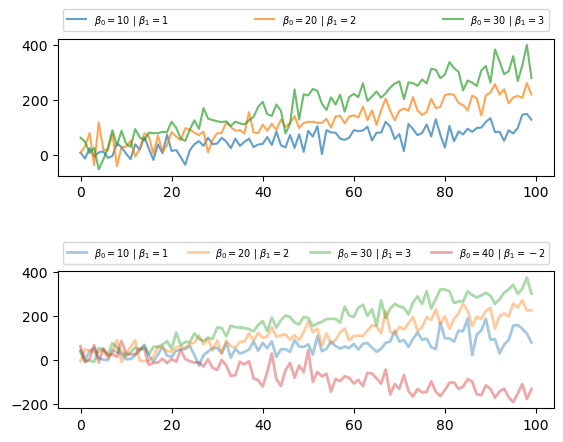

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the frame and subplots
fig, ax = plt.subplots(2, 1)
plt.subplots_adjust(hspace=0.7)

# Create a function that generates synthetic data
def generate_data(β_0, β_1, σ=30, n=100):
    x_values = np.arange(0, n, 1)
    y_values = β_0 + β_1 * x_values + np.random.normal(size=n, scale=σ)
    return x_values, y_values

# Store the keyword arguments for lines and legends in a dictionary
line_kargs = {'lw': 1.5, 'alpha': 0.7}
legend_kargs = {'bbox_to_anchor': (0., 1.02, 1., .102), 
                'loc': 3, 
                'ncol': 4,
                'mode': 'expand', 
                'prop': {'size': 7}}

β_0s = [10, 20, 30]
β_1s = [1, 2, 3]

# Use a for loop to plot lines
def generate_plots(β_0s, β_1s, idx, line_kargs, legend_kargs):
    label_list = []
    for βs in zip(β_0s, β_1s):
    
        # Use * to unpack tuple βs and the tuple output from the generate_data function
        # Use ** to unpack the dictionary of keyword arguments for lines
        ax[idx].plot(*generate_data(*βs), **line_kargs)

        label_list.append(f'$β_0 = {βs[0]}$ | $β_1 = {βs[1]}$')

    # Use ** to unpack the dictionary of keyword arguments for legends
    ax[idx].legend(label_list, **legend_kargs)

generate_plots(β_0s, β_1s, 0, line_kargs, legend_kargs)

# We can easily reuse and update our parameters
β_1s.append(-2)
β_0s.append(40)
line_kargs['lw'] = 2
line_kargs['alpha'] = 0.4

generate_plots(β_0s, β_1s, 1, line_kargs, legend_kargs)
plt.show()

In this example, `*` unpacked the zipped parameters `βs` and the output of `generate_data` function stored in tuples, 
while `**` unpacked graphical parameters stored in `legend_kargs` and `line_kargs`.

To summarize, when `*list`/`*tuple` and `**dictionary` are passed into *function calls*, they are unpacked into individual arguments instead of a collection.

The difference is that `*` will unpack lists and tuples into *positional arguments*, while `**` will unpack dictionaries into *keyword arguments*.

### Arbitrary Arguments

When we *define* functions, it is sometimes desirable to allow users to put as many arguments as they want into a function. 

You might have noticed that the `ax.plot()` function could handle arbitrarily many arguments.

If we look at the [documentation](https://github.com/matplotlib/matplotlib/blob/v3.6.2/lib/matplotlib/axes/_axes.py#L1417-L1669) of the function, we can see the function is defined as

```
Axes.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
```

We found `*` and `**` operators again in the context of the *function definition*.

In fact, `*args` and `**kargs` are ubiquitous in the scientific libraries in Python to reduce redundancy and allow flexible inputs.

`*args` enables the function to handle *positional arguments* with a variable size

In [29]:
l1 = ['a', 'b', 'c']
l2 = ['b', 'c', 'd']

def arb(*ls):
    print(ls)

arb(l1, l2)

(['a', 'b', 'c'], ['b', 'c', 'd'])


The inputs are passed into the function and stored in a tuple.

Let's try more inputs

In [30]:
l3 = ['z', 'x', 'b']
arb(l1, l2, l3)

(['a', 'b', 'c'], ['b', 'c', 'd'], ['z', 'x', 'b'])


Similarly, Python allows us to use `**kargs` to pass arbitrarily many *keyword arguments* into functions

In [31]:
def arb(**ls):
    print(ls)

# Note that these are keyword arguments
arb(l1=l1, l2=l2)

{'l1': ['a', 'b', 'c'], 'l2': ['b', 'c', 'd']}


We can see Python uses a dictionary to store these keyword arguments.

Let's try more inputs

In [32]:
arb(l1=l1, l2=l2, l3=l3)

{'l1': ['a', 'b', 'c'], 'l2': ['b', 'c', 'd'], 'l3': ['z', 'x', 'b']}


Overall, `*args` and `**kargs` are used when *defining a function*; they enable the function to take input with an arbitrary size.

The difference is that functions with `*args` will be able to take *positional arguments* with an arbitrary size, while `**kargs` will allow functions to take arbitrarily many *keyword arguments*.

## Decorators and Descriptors

```{index} single: Python; Decorators
```

```{index} single: Python; Descriptors
```

Let's look at some special syntax elements that are routinely used by Python developers.

You might not need the following concepts immediately, but you will see them
in other people's code.

Hence you need to understand them at some stage of your Python education.

### Decorators

```{index} single: Python; Decorators
```

Decorators are a bit of syntactic sugar that, while easily avoided, have turned out to be popular.

It's very easy to say what decorators do.

On the other hand it takes a bit of effort to explain *why* you might use them.

#### An Example

Suppose we are working on a program that looks something like this

In [33]:
import numpy as np

def f(x):
    return np.log(np.log(x))

def g(x):
    return np.sqrt(42 * x)

# Program continues with various calculations using f and g

Now suppose there's a problem: occasionally negative numbers get fed to `f` and `g` in the calculations that follow.

If you try it, you'll see that when these functions are called with negative numbers they return a NumPy object called `nan` .

This stands for "not a number" (and indicates that you are trying to evaluate
a mathematical function at a point where it is not defined).

Perhaps this isn't what we want, because it causes other problems that are hard to pick up later on.

Suppose that instead we want the program to terminate whenever this happens, with a sensible error message.

This change is easy enough to implement

In [34]:
import numpy as np

def f(x):
    assert x >= 0, "Argument must be nonnegative"
    return np.log(np.log(x))

def g(x):
    assert x >= 0, "Argument must be nonnegative"
    return np.sqrt(42 * x)

# Program continues with various calculations using f and g

Notice however that there is some repetition here, in the form of two identical lines of code.

Repetition makes our code longer and harder to maintain, and hence is
something we try hard to avoid.

Here it's not a big deal, but imagine now that instead of just `f` and `g`, we have 20 such functions that we need to modify in exactly the same way.

This means we need to repeat the test logic (i.e., the `assert` line testing nonnegativity) 20 times.

The situation is still worse if the test logic is longer and more complicated.

In this kind of scenario the following approach would be neater

In [35]:
import numpy as np

def check_nonneg(func):
    def safe_function(x):
        assert x >= 0, "Argument must be nonnegative"
        return func(x)
    return safe_function

def f(x):
    return np.log(np.log(x))

def g(x):
    return np.sqrt(42 * x)

f = check_nonneg(f)
g = check_nonneg(g)
# Program continues with various calculations using f and g

This looks complicated so let's work through it slowly.

To unravel the logic, consider what happens when we say `f = check_nonneg(f)`.

This calls the function `check_nonneg` with parameter `func` set equal to `f`.

Now `check_nonneg` creates a new function called `safe_function` that
verifies `x` as nonnegative and then calls `func` on it (which is the same as `f`).

Finally, the global name `f` is then set equal to `safe_function`.

Now the behavior of `f` is as we desire, and the same is true of `g`.

At the same time, the test logic is written only once.

#### Enter Decorators

```{index} single: Python; Decorators
```

The last version of our code is still not ideal.

For example, if someone is reading our code and wants to know how
`f` works, they will be looking for the function definition, which is

In [36]:
def f(x):
    return np.log(np.log(x))

They may well miss the line `f = check_nonneg(f)`.

For this and other reasons, decorators were introduced to Python.

With decorators, we can replace the lines

In [37]:
def f(x):
    return np.log(np.log(x))

def g(x):
    return np.sqrt(42 * x)

f = check_nonneg(f)
g = check_nonneg(g)

with

In [38]:
@check_nonneg
def f(x):
    return np.log(np.log(x))

@check_nonneg
def g(x):
    return np.sqrt(42 * x)

These two pieces of code do exactly the same thing.

If they do the same thing, do we really need decorator syntax?

Well, notice that the decorators sit right on top of the function definitions.

Hence anyone looking at the definition of the function will see them and be
aware that the function is modified.

In the opinion of many people, this makes the decorator syntax a significant improvement to the language.

(descriptors)=
### Descriptors

```{index} single: Python; Descriptors
```

Descriptors solve a common problem regarding management of variables.

To understand the issue, consider a `Car` class, that simulates a car.

Suppose that this class defines the variables `miles` and `kms`, which give the distance traveled in miles
and kilometers respectively.

A highly simplified version of the class might look as follows

In [39]:
class Car:

    def __init__(self, miles=1000):
        self.miles = miles
        self.kms = miles * 1.61

    # Some other functionality, details omitted

One potential problem we might have here is that a user alters one of these
variables but not the other

In [40]:
car = Car()
car.miles

1000

In [41]:
car.kms

1610.0

In [42]:
car.miles = 6000
car.kms

1610.0

In the last two lines we see that `miles` and `kms` are out of sync.

What we really want is some mechanism whereby each time a user sets one of these variables, *the other is automatically updated*.

#### A Solution

In Python, this issue is solved using *descriptors*.

A descriptor is just a Python object that implements certain methods.

These methods are triggered when the object is accessed through dotted attribute notation.

The best way to understand this is to see it in action.

Consider this alternative version of the `Car` class

In [43]:
class Car:

    def __init__(self, miles=1000):
        self._miles = miles
        self._kms = miles * 1.61

    def set_miles(self, value):
        self._miles = value
        self._kms = value * 1.61

    def set_kms(self, value):
        self._kms = value
        self._miles = value / 1.61

    def get_miles(self):
        return self._miles

    def get_kms(self):
        return self._kms

    miles = property(get_miles, set_miles)
    kms = property(get_kms, set_kms)

First let's check that we get the desired behavior

In [44]:
car = Car()
car.miles

1000

In [45]:
car.miles = 6000
car.kms

9660.0

Yep, that's what we want --- `car.kms` is automatically updated.

#### How it Works

The names `_miles` and `_kms` are arbitrary names we are using to store the values of the variables.

The objects `miles` and `kms` are *properties*, a common kind of descriptor.

The methods `get_miles`, `set_miles`, `get_kms` and `set_kms` define
what happens when you get (i.e. access) or set (bind) these variables

* So-called "getter" and "setter" methods.

The builtin Python function `property` takes getter and setter methods and creates a property.

For example, after `car` is created as an instance of `Car`, the object `car.miles` is a property.

Being a property, when we set its value via `car.miles = 6000` its setter
method is triggered --- in this case `set_miles`.

#### Decorators and Properties

```{index} single: Python; Decorators
```

```{index} single: Python; Properties
```

These days its very common to see the `property` function used via a decorator.

Here's another version of our `Car` class that works as before but now uses
decorators to set up the properties

In [46]:
class Car:

    def __init__(self, miles=1000):
        self._miles = miles
        self._kms = miles * 1.61

    @property
    def miles(self):
        return self._miles

    @property
    def kms(self):
        return self._kms

    @miles.setter
    def miles(self, value):
        self._miles = value
        self._kms = value * 1.61

    @kms.setter
    def kms(self, value):
        self._kms = value
        self._miles = value / 1.61

We won't go through all the details here.

For further information you can refer to the [descriptor documentation](https://docs.python.org/3/howto/descriptor.html).

(paf_generators)=
## Generators

```{index} single: Python; Generators
```

A generator is a kind of iterator (i.e., it works with a `next` function).

We will study two ways to build generators: generator expressions and generator functions.

### Generator Expressions

The easiest way to build generators is using *generator expressions*.

Just like a list comprehension, but with round brackets.

Here is the list comprehension:

In [47]:
singular = ('dog', 'cat', 'bird')
type(singular)

tuple

In [48]:
plural = [string + 's' for string in singular]
plural

['dogs', 'cats', 'birds']

In [49]:
type(plural)

list

And here is the generator expression

In [50]:
singular = ('dog', 'cat', 'bird')
plural = (string + 's' for string in singular)
type(plural)

generator

In [51]:
next(plural)

'dogs'

In [52]:
next(plural)

'cats'

In [53]:
next(plural)

'birds'

Since `sum()` can be called on iterators, we can do this

In [54]:
sum((x * x for x in range(10)))

285

The function `sum()` calls `next()` to get the items, adds successive terms.

In fact, we can omit the outer brackets in this case

In [55]:
sum(x * x for x in range(10))

285

### Generator Functions

```{index} single: Python; Generator Functions
```

The most flexible way to create generator objects is to use generator functions.

Let's look at some examples.

#### Example 1

Here's a very simple example of a generator function

In [56]:
def f():
    yield 'start'
    yield 'middle'
    yield 'end'

It looks like a function, but uses a keyword `yield` that we haven't met before.

Let's see how it works after running this code

In [57]:
type(f)

function

In [58]:
gen = f()
gen

<generator object f at 0x7f549ff56da0>

In [59]:
next(gen)

'start'

In [60]:
next(gen)

'middle'

In [61]:
next(gen)

'end'

In [62]:
next(gen)

StopIteration: 

The generator function `f()` is used to create generator objects (in this case `gen`).

Generators are iterators, because they support a `next` method.

The first call to `next(gen)`

* Executes code in the body of `f()` until it meets a `yield` statement.
* Returns that value to the caller of `next(gen)`.

The second call to `next(gen)` starts executing *from the next line*

In [63]:
def f():
    yield 'start'
    yield 'middle'  # This line!
    yield 'end'

and continues until the next `yield` statement.

At that point it returns the value following `yield` to the caller of `next(gen)`, and so on.

When the code block ends, the generator throws a `StopIteration` error.

#### Example 2

Our next example receives an argument `x` from the caller

In [64]:
def g(x):
    while x < 100:
        yield x
        x = x * x

Let's see how it works

In [65]:
g

<function __main__.g(x)>

In [66]:
gen = g(2)
type(gen)

generator

In [67]:
next(gen)

2

In [68]:
next(gen)

4

In [69]:
next(gen)

16

In [70]:
next(gen)

StopIteration: 

The call `gen = g(2)` binds `gen` to a generator.

Inside the generator, the name `x` is bound to `2`.

When we call `next(gen)`

* The body of `g()` executes until the line `yield x`, and the value of `x` is returned.

Note that value of `x` is retained inside the generator.

When we call `next(gen)` again, execution continues *from where it left off*

In [71]:
def g(x):
    while x < 100:
        yield x
        x = x * x  # execution continues from here

When `x < 100` fails, the generator throws a `StopIteration` error.

Incidentally, the loop inside the generator can be infinite

In [72]:
def g(x):
    while 1:
        yield x
        x = x * x

### Advantages of Iterators

What's the advantage of using an iterator here?

Suppose we want to sample a binomial(n,0.5).

One way to do it is as follows

In [73]:
import random
n = 10000000
draws = [random.uniform(0, 1) < 0.5 for i in range(n)]
sum(draws)

4999494

But we are creating two huge lists here,  `range(n)` and `draws`.

This uses lots of memory and is very slow.

If we make `n` even bigger then this happens

In [74]:
n = 100000000
draws = [random.uniform(0, 1) < 0.5 for i in range(n)]

We can avoid these problems using iterators.

Here is the generator function

In [75]:
def f(n):
    i = 1
    while i <= n:
        yield random.uniform(0, 1) < 0.5
        i += 1

Now let's do the sum

In [76]:
n = 10000000
draws = f(n)
draws

<generator object f at 0x7f5494e872a0>

In [77]:
sum(draws)

5002205

In summary, iterables

* avoid the need to create big lists/tuples, and
* provide a uniform interface to iteration that can be used transparently in `for` loops


## Exercises


```{exercise-start}
:label: paf_ex1
```

Complete the following code, and test it using [this csv file](https://raw.githubusercontent.com/QuantEcon/lecture-python-programming/master/source/_static/lecture_specific/python_advanced_features/test_table.csv), which we assume that you've put in your current working directory

```{code-block} python3
:class: no-execute

def column_iterator(target_file, column_number):
    """A generator function for CSV files.
    When called with a file name target_file (string) and column number
    column_number (integer), the generator function returns a generator
    that steps through the elements of column column_number in file
    target_file.
    """
    # put your code here

dates = column_iterator('test_table.csv', 1)

for date in dates:
    print(date)
```

```{exercise-end}
```

```{solution-start} paf_ex1
:class: dropdown
```

One solution is as follows

In [78]:
def column_iterator(target_file, column_number):
    """A generator function for CSV files.
    When called with a file name target_file (string) and column number
    column_number (integer), the generator function returns a generator
    which steps through the elements of column column_number in file
    target_file.
    """
    f = open(target_file, 'r')
    for line in f:
        yield line.split(',')[column_number - 1]
    f.close()

dates = column_iterator('test_table.csv', 1)

i = 1
for date in dates:
    print(date)
    if i == 10:
        break
    i += 1

Date
2009-05-21
2009-05-20
2009-05-19
2009-05-18
2009-05-15
2009-05-14
2009-05-13
2009-05-12
2009-05-11


```{solution-end}
```